In [174]:
#pip install yfinance

In [236]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2021, 2, 2)
end = datetime.datetime(2022, 1, 1)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.330002
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.289993
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.380005
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,178.199997
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,177.570007


In [231]:
#df = pd.DataFrame(df)
# append data frame to CSV file
#header_list=["Open","High","Low","Close","Volume","Dividends","StockSplits"]
df.to_csv('stockdetails1.csv', mode='a', index=False)

In [232]:
df=pd.read_csv('stockdetails1.csv')
#data.columns=['Open','High','Low','Close','Volume','Dividends','StockSplits']

In [233]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
0,135.3800048828125,130.92999267578125,133.75,134.13999938964844,106239800.0,133.318115234375
1,136.30999755859375,134.61000061035156,135.72999572753906,134.99000549316406,83305400.0,134.16293334960938
2,135.77000427246094,133.61000061035156,135.75999450683594,133.94000244140625,89880900.0,133.1193389892578
3,137.39999389648438,134.58999633789062,136.3000030517578,137.38999938964844,84183100.0,136.5482177734375
4,137.4199981689453,135.86000061035156,137.35000610351562,136.75999450683594,75693800.0,136.1251678466797


In [237]:
df.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [238]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [239]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,233.000000,233.000000,233.000000,233.000000,2.330000e+02,233.000000
mean,142.941288,140.166824,141.494722,141.637854,8.828337e+07,141.296425
std,15.113750,14.751801,14.814063,14.986744,2.829124e+07,15.158939
min,120.400002,116.209999,119.029999,116.360001,4.100000e+07,115.819870
25%,130.389999,127.129997,129.199997,129.639999,6.788520e+07,129.107895
50%,144.070007,141.279999,142.470001,142.649994,8.227830e+07,142.442108
75%,150.190002,147.869995,149.119995,149.149994,1.048186e+08,148.882721
max,182.130005,178.529999,181.119995,180.330002,1.954327e+08,180.330002


In [240]:
#pip install pandas_datareader

In [241]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

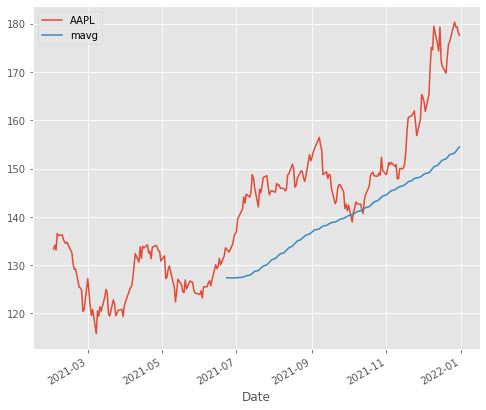

In [242]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

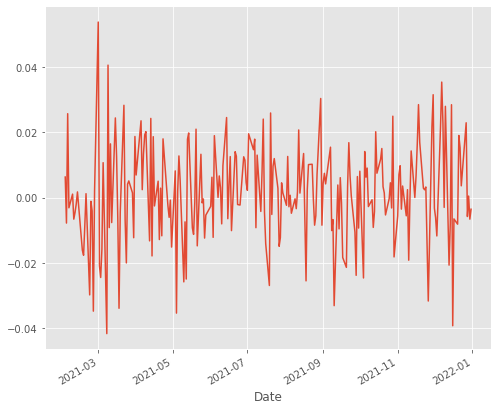

In [243]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [244]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT','TSLA'],'yahoo',start=start,end=end)['Adj Close']

In [245]:
dfcomp.head()

Symbols,AAPL,GE,GOOG,IBM,MSFT,TSLA
Date,,,,,,
2021-02-01,133.318115,85.649734,1901.349976,109.718681,237.657867,839.809998
2021-02-02,134.162918,89.637161,1927.510010,108.717430,237.519043,872.789978
2021-02-03,133.119354,89.318161,2070.070068,108.426170,240.980042,854.690002
2021-02-04,136.548203,91.311874,2062.370117,110.155602,239.998260,849.989990
2021-02-05,136.125183,90.913132,2098.000000,110.856468,240.186676,852.229980


In [246]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()

Text(0, 0.5, 'Returns TSLA')

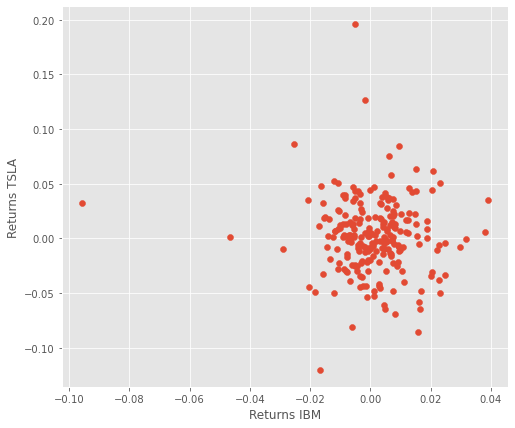

In [247]:
plt.scatter(retscomp.IBM, retscomp.TSLA)
plt.xlabel('Returns IBM')
plt.ylabel('Returns TSLA')

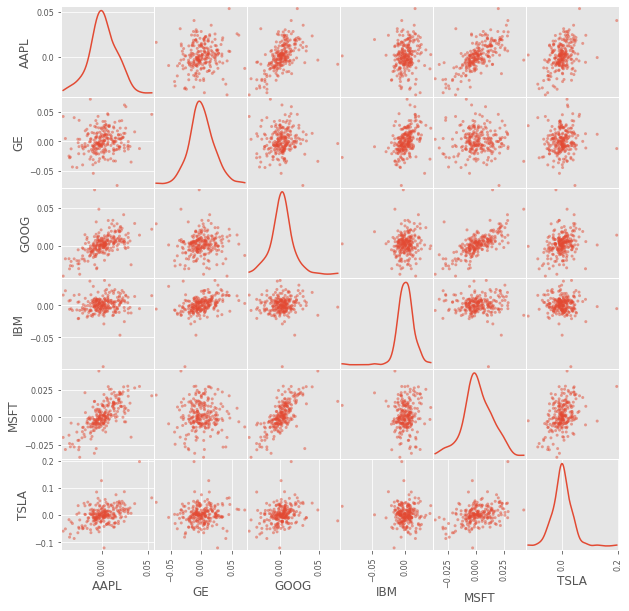

In [248]:
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

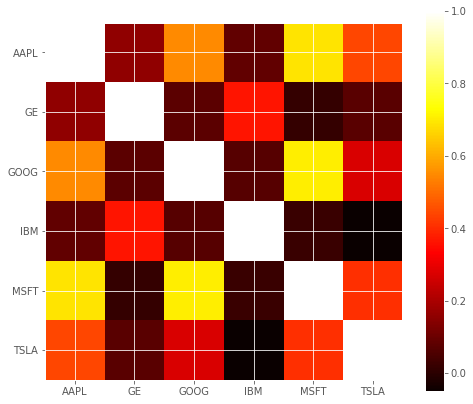

In [249]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

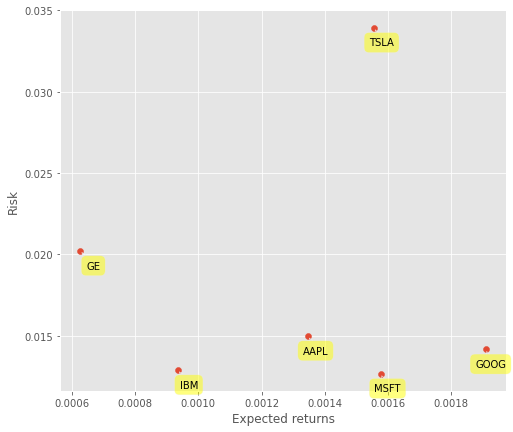

In [250]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [251]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [252]:
import math
from sklearn import preprocessing
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

X_train = X[:80]
y_train = y[:80]

X_test = X[80:]
y_test = y[80:]

In [253]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [254]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])

In [255]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [256]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)
print(confidencereg)
print(confidencepoly2)
print(confidencepoly3)
print(confidenceknn)


0.6429134287841564
-1.4007286011670823
-2.901740829653285
-1.6920328130509579


In [259]:
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
#print(dfreg['Forecast'])

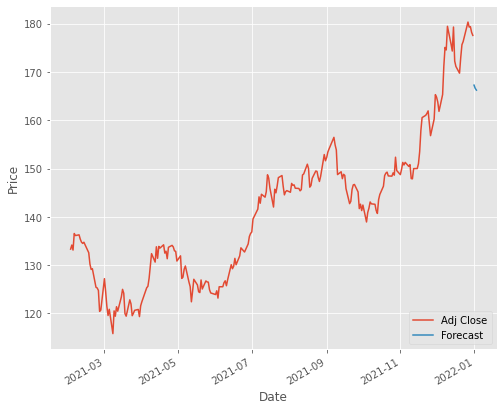

In [258]:
#plotting the prediction
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()